## **Data Analysis Python Project - Blinkit Analysis**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Data**

In [2]:
df=pd.read_csv("C:/Users/Aleena Antony/Desktop/Data Analysis Python Project/blinkit_data.csv")

### **Sample Data**

In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### **Size of Data**

In [5]:
print("Size of data:",df.shape)

Size of data: (8523, 12)


### **Field information**

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Data types**

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data Cleaning**

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat',
                                                        'low fat':'Low Fat',
                                                        'reg':'Regular'})

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [11]:
print(df[['Item Type', 'Rating']].isnull().sum())

Item Type    0
Rating       0
dtype: int64


In [12]:
print(df['Item Type'].unique())

['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']


### **Business Requirements**

### **KPI's Requirements**

In [13]:
#Total Sales
total_sales = df['Sales'].sum()

#Average sales
avg_sales = df['Sales'].mean()

#No of Items sold 
no_of_items_sold = df['Sales'].count()

#Average rating 
avg_rating = df['Rating'].mean() 

#display 
print(f"Total Sales: ${total_sales: ,.1f}")
print(f"Average Sales: ${avg_sales: ,.0f}")
print(f"No of Items sold:{no_of_items_sold: ,.0f}")
print(f"Average Ratings: {avg_rating:,.1f}")

Total Sales: $ 1,201,681.5
Average Sales: $ 141
No of Items sold: 8,523
Average Ratings: 4.0


### **Charts Requirements**

#### **Total Sales by Fat Content**

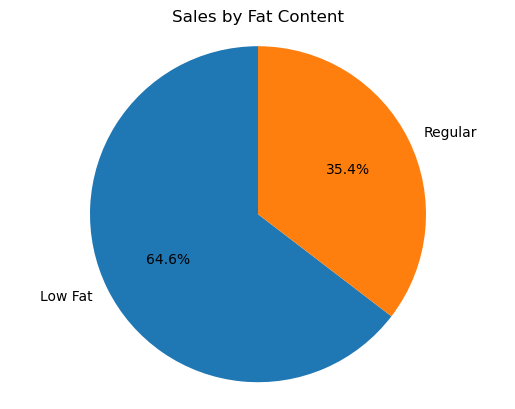

In [14]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels=sales_by_fat.index,
       autopct = '%.1f%%',startangle=90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### **Total Sales by Item type**

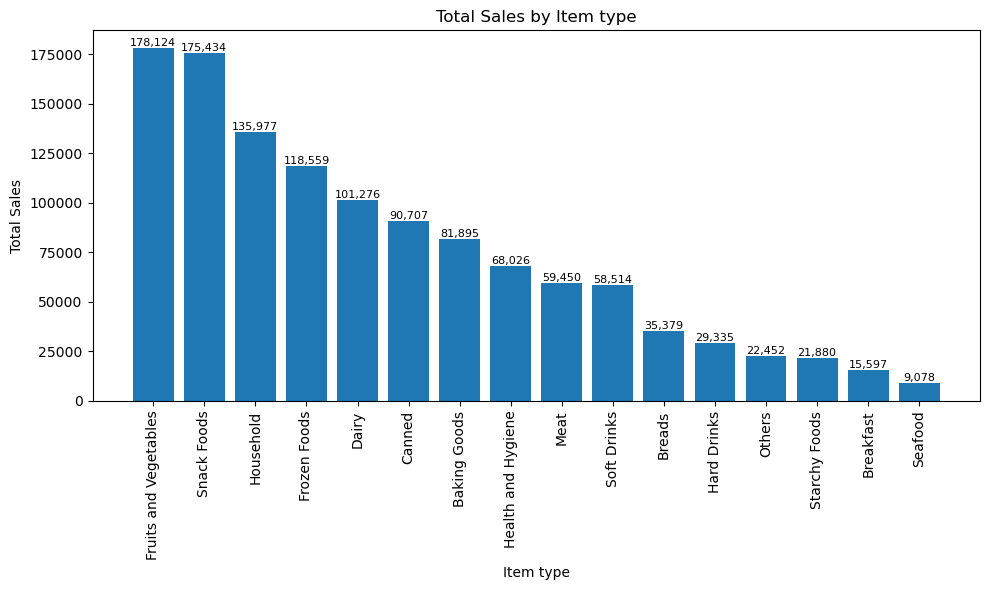

In [15]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():,.0f}' , ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for Total sales**

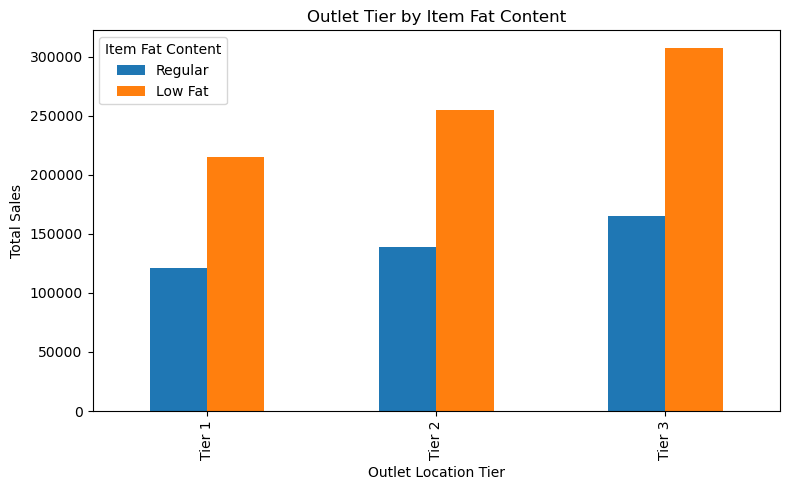

In [16]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Establishment**

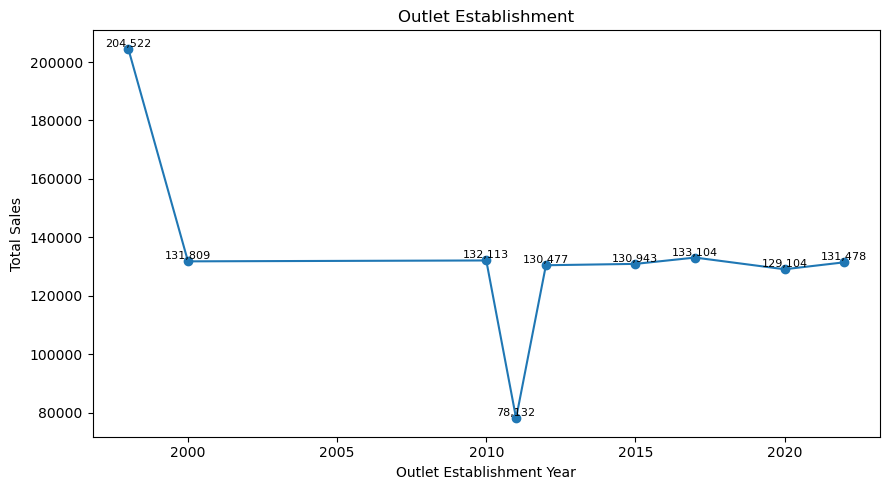

In [17]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### **Sales by Outlet Size**

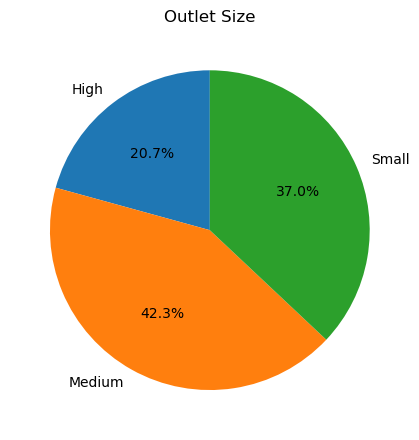

In [18]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4.5,4.5))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### **Sales by Outlet Location**

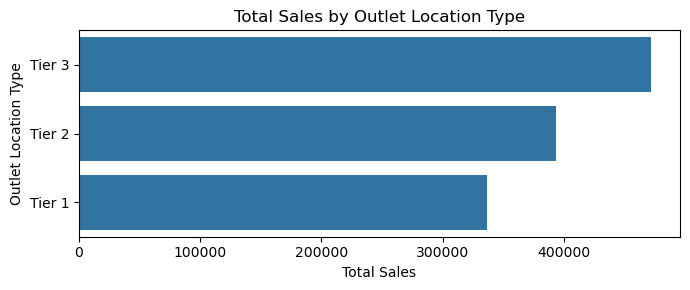

In [19]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(7,3)) #smaller height enough width
ax = sns.barplot(x='Sales', y ='Outlet Location Type', data=sales_by_location)
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.title('Total Sales by Outlet Location Type')

plt.tight_layout()
plt.show() 

#### **Sales by Outlet Type**

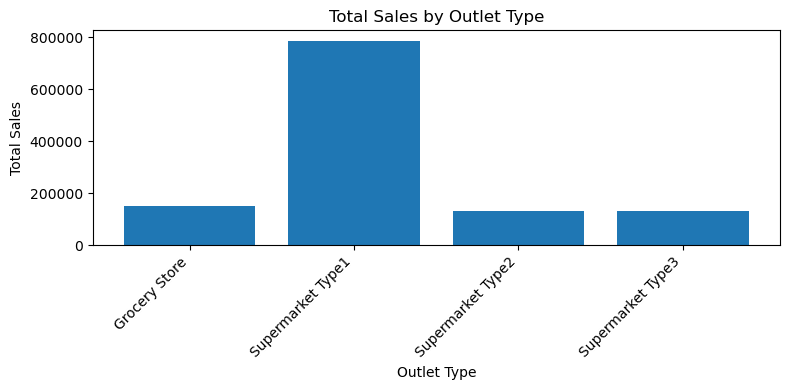

In [20]:
sales_by_outlet_type = df.groupby('Outlet Type')['Sales'].sum().reset_index()
average_sales_by_outlet_type = df.groupby('Outlet Type')['Sales'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(sales_by_outlet_type['Outlet Type'], sales_by_outlet_type['Sales'])

plt.title('Total Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()